In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Data = pd.read_csv('data.csv',header=None)


In [20]:


class PreprocessData:
    def NomalizeData(Data):
        lenght = len(Data)
        normalizedData = []
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [21]:
#devide data to test and train 
Dataset = PreprocessData.TestAndTrain(Data , 70)

TrainData = Dataset[0]
TestData = Dataset[1]



In [22]:
#normalize train data 
x= PreprocessData.NomalizeData( pd.Series.tolist( TrainData[0]))
y = PreprocessData.NomalizeData( pd.Series.tolist( TrainData[1]))


In [23]:
#add 1 colum  to X data 
biasX = np.c_[np.ones((len(x) , 1)) , x ]

In [24]:
#computing theta
def ComputingTheta(X ,Y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta

In [25]:
#computing hypothesis function 
def ComputingHypothesis(X , Theta):
    return np.dot(X , Theta)


In [26]:
#computing j(theta)
def ComputingJtheta(hypothesisTeta , Y ):
    val = 0
    for i in range(len(Y)):
        val += ((1/2) * (( hypothesisTeta[i] - Y[i])**2))
    return val
        
    

In [27]:
theta = ComputingTheta(biasX , y)
predictedTrainY = ComputingHypothesis(biasX , theta)
def ComputeAcurecy( y , ypred):
    ymean = np.mean(y)
    num = np.sum((y-ypred)**2)
    denom = np.sum((y-ymean)**2)
    output = 1 - (num/denom)
    return output
accuracy = round((ComputeAcurecy(y , predictedTrainY) * 100),2)
print ("accuracy is = " + str(accuracy) + " % " )

accuracy is = 92.94 % 


Text(0, 0.5, 'Y')

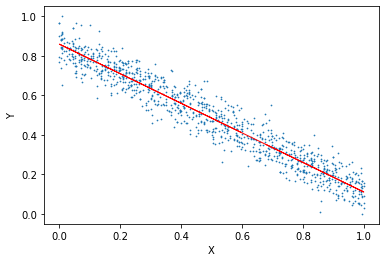

In [28]:

plt.plot(x , y , "o" , markersize=0.7 )
plt.plot(x , predictedTrainY , "-r" , linewidth=1 )
plt.xlabel("X")
plt.ylabel("Y")

In [29]:
#normalize test data 
testX= PreprocessData.NomalizeData( pd.Series.tolist( TestData[0]))
testY = PreprocessData.NomalizeData( pd.Series.tolist( TestData[1]))


#compute the Y for test data with theta
def ComputeTestY(testX , theta):
    #add 1 colum  to X test data 
    biasTestX = np.c_[np.ones((len(testX) , 1)) , testX ]
    
    predictedYtest = biasTestX.dot(theta)
    return predictedYtest

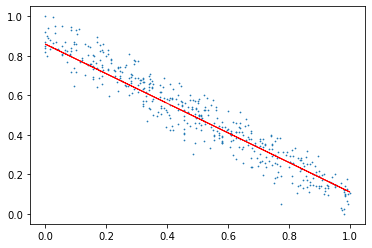

In [30]:
predictedYtest = ComputeTestY(testX , theta )               
plt.plot(testX , testY , "o" , markersize=0.7 )
plt.plot(testX , predictedYtest , "-r" , linewidth=1)

In [31]:
jThetatrain = ComputingJtheta(predictedTrainY , y)
JThetatest = ComputingJtheta(predictedYtest ,testY)

print(jThetatrain  )
print (JThetatest)


1.9304475143609579
0.9929773754384136
